In [1]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
# import dataset
dataset=pd.read_csv("Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Data Visualization

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
# Box plot
dataset.boxplot(column=['Salary'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

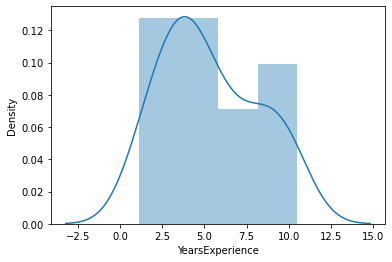

In [5]:
sns.distplot(dataset['YearsExperience'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

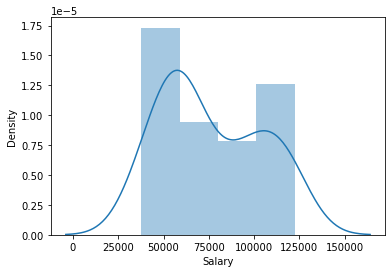

In [6]:
sns.distplot(dataset['Salary'])

<AxesSubplot:>

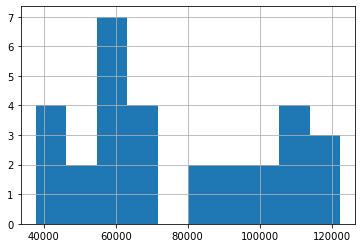

In [19]:
# histogram of Ozone
dataset['Salary'].hist()

# Correlation Analysis

In [7]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

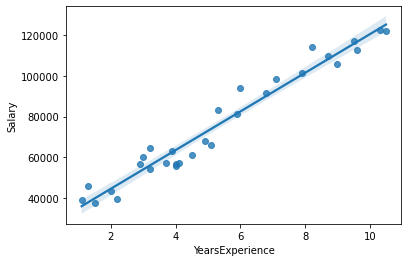

In [42]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

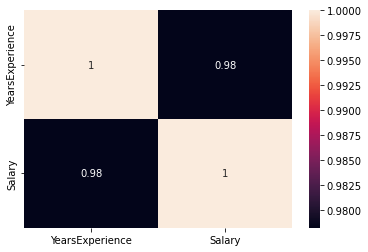

In [23]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = dataset.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()


Text(0, 0.5, 'YearsExperience')

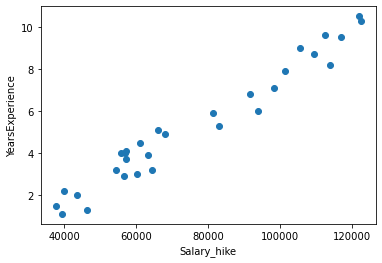

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter("Salary","YearsExperience",data=dataset)
plt.xlabel("Salary_hike")
plt.ylabel("YearsExperience")

In [9]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

In [10]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [11]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [12]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Predictions

In [13]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [14]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [15]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [16]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [28]:
# Input dataset
X = dataset['Salary'].values.reshape(-1,1)
print(X)
# Output or Predicted Value of data
y = dataset['YearsExperience'].values.reshape(-1,1)
#print(log(y))

[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

In [31]:
predict_reg = LinearRegression()

# Logrithm Transformation

In [33]:
 #Input dataset
X_log = np.log(dataset['Salary'].values.reshape(-1,1))

# Output or Predicted Value of data
y_log = dataset['YearsExperience'].values.reshape(-1,1)

In [34]:
X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

In [35]:
y_pred_log= LinearRegression()
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [36]:
print(" Intercept value of Model is " ,y_pred_log.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_log.coef_)

 Intercept value of Model is  [-77.54075207]
Co-efficient Value of Log Model is :  [[7.42336504]]


In [37]:
l_model= y_pred_log.predict(X_test_1og)
l_model

array([[8.80714547],
       [5.05421147],
       [8.88431478],
       [6.54857021],
       [4.66238119],
       [3.77565597]])

In [38]:
pmsh_pf_1 = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
pmsh_pf_1

,Actual,Predict
0,9.6,8.807145
1,4.9,5.054211
2,8.2,8.884315
3,5.3,6.548570
4,3.2,4.662381
5,3.7,3.775656


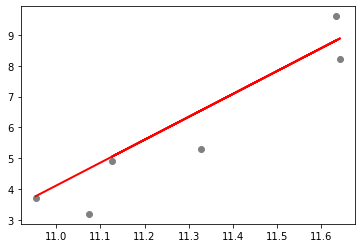

In [39]:
plt.scatter(X_test_1og, Y_test_log,  color='gray')
plt.plot(X_test_1og, l_model, color='red', linewidth=2)
plt.show()

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, l_model))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, l_model) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, l_model)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log, l_model))

Mean Absolute Error: 0.7363313598023381
Mean Squared Error: 0.8039827250752735
Root Mean Squared Error: 0.8966508378824354
R^2 Score :           0.8512443948054178


# Quadratic Transformation Model

In [49]:
dataset['Square_S_hike'] = dataset.apply(lambda row: row.Salary**2, axis =1 )
dataset

,YearsExperience,Salary,Cube_S_hike,Square_S_hike
0,1.1,39343.0,6.089791e+13,1.547872e+09
1,1.3,46205.0,9.864315e+13,2.134902e+09
2,1.5,37731.0,5.371492e+13,1.423628e+09
3,2.0,43525.0,8.245488e+13,1.894426e+09
4,2.2,39891.0,6.347822e+13,1.591292e+09
5,2.9,56642.0,1.817254e+14,3.208316e+09
6,3.0,60150.0,2.176241e+14,3.618022e+09
7,3.2,54445.0,1.613890e+14,2.964258e+09
8,3.2,64445.0,2.676503e+14,4.153158e+09
9,3.7,57189.0,1.870413e+14,3.270582e+09


In [50]:
X_q = dataset.iloc[:,dataset.columns != 'YearsExperience']
Y_q = dataset.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X_q, Y_q, test_size=0.2, random_state= 42)
print(Y_test)

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64


In [51]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [52]:
print(" Intercept value of Model is " ,model.intercept_)

coeff_df = pd.DataFrame(model.coef_,X_q.columns ,columns=['Coefficient'])
print(coeff_df)

 Intercept value of Model is  -4.3655745685100555e-11
                Coefficient
Salary         1.000000e+00
Cube_S_hike    1.665042e-25
Square_S_hike -3.130499e-20


In [54]:
y_pred_q_q = model.predict(X_test)

In [55]:
df_qm = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q_q})
df_qm.head()

,Actual,Predicted
27,112635.0,112635.0
15,67938.0,67938.0
23,113812.0,113812.0
17,83088.0,83088.0
8,64445.0,64445.0


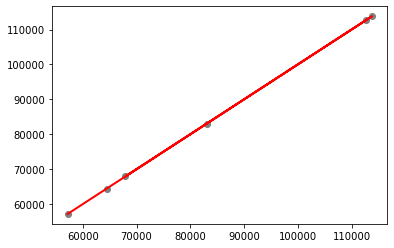

In [56]:
x_t =np.array(X_test)
plt.scatter(x_t[:,0], Y_test,  color='gray')
plt.plot(x_t[:,0], y_pred_q_q, color='red', linewidth=2)
plt.show()

In [57]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_q_q))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_q_q) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_q_q)))
print("R^2 Score :          ", metrics.r2_score(Y_test, y_pred_q_q))

Mean Absolute Error: 9.701276818911234e-12
Mean Squared Error: 1.4117215787571672e-22
Root Mean Squared Error: 1.1881589029911644e-11
R^2 Score :           1.0


# Polynomial Transformation Model

In [58]:
dataset['Cube_S_hike'] = dataset.apply(lambda row: row.Salary**3, axis =1 )
dataset

,YearsExperience,Salary,Cube_S_hike,Square_S_hike
0,1.1,39343.0,6.089791e+13,1.547872e+09
1,1.3,46205.0,9.864315e+13,2.134902e+09
2,1.5,37731.0,5.371492e+13,1.423628e+09
3,2.0,43525.0,8.245488e+13,1.894426e+09
4,2.2,39891.0,6.347822e+13,1.591292e+09
5,2.9,56642.0,1.817254e+14,3.208316e+09
6,3.0,60150.0,2.176241e+14,3.618022e+09
7,3.2,54445.0,1.613890e+14,2.964258e+09
8,3.2,64445.0,2.676503e+14,4.153158e+09
9,3.7,57189.0,1.870413e+14,3.270582e+09


In [59]:
X_c = dataset.iloc[:,dataset.columns != 'YearsExperience']
Y_c = dataset.iloc[:,1]
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c, Y_c, test_size=0.2, random_state= 42)
print(Y_test)

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64


In [60]:
cube_model = LinearRegression()
cube_model.fit(X_train_c, Y_train_c)

LinearRegression()

In [61]:
print(" Intercept value of Cubic Model is " ,cube_model.intercept_)

coeff_df = pd.DataFrame(cube_model.coef_, X_c.columns, columns=['Coefficient'])
print(coeff_df)

 Intercept value of Cubic Model is  -4.3655745685100555e-11
                Coefficient
Salary         1.000000e+00
Cube_S_hike    1.665042e-25
Square_S_hike -3.130499e-20


In [62]:
y_pred_cube = cube_model.predict(X_test_c)

In [63]:
df_33 = pd.DataFrame({'Actual':Y_test_c, 'Predicted': y_pred_cube})
df_33.head()

,Actual,Predicted
27,112635.0,112635.0
15,67938.0,67938.0
23,113812.0,113812.0
17,83088.0,83088.0
8,64445.0,64445.0


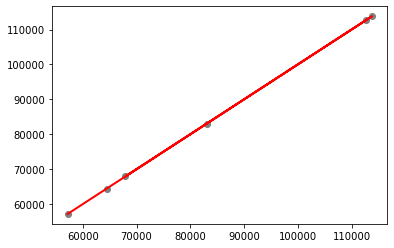

In [64]:
x_t_c =np.array(X_test_c)
plt.scatter(x_t_c[:,0], Y_test_c,  color='gray')
plt.plot(x_t_c[:,0], y_pred_cube, color='red', linewidth=2)
plt.show()

In [65]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_c, y_pred_cube))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_c, y_pred_cube) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_c, y_pred_cube)))
print("R^2 Score :          ", metrics.r2_score(Y_test_c, y_pred_cube))

Mean Absolute Error: 9.701276818911234e-12
Mean Squared Error: 1.4117215787571672e-22
Root Mean Squared Error: 1.1881589029911644e-11
R^2 Score :           1.0
